# Load modules

In [2]:
import pandas as pd
import numpy as np
import tensorflow as tf

In [3]:
!wget 'https://cainvas.ai-tech.systems:9000/hub/user-redirect/lab/tree/hrt/Heart-Failure-Prediction-main.zip'
!unzip -qo Heart-Failure-Prediction-main.zip

--2021-09-09 06:18:39--  https://cainvas.ai-tech.systems:9000/hub/user-redirect/lab/tree/hrt/Heart-Failure-Prediction-main.zip
Resolving cainvas.ai-tech.systems (cainvas.ai-tech.systems)... 65.1.254.242
Connecting to cainvas.ai-tech.systems (cainvas.ai-tech.systems)|65.1.254.242|:9000... connected.
HTTP request sent, awaiting response... 302 Found
Location: /hub/login?next=%2Fhub%2Fuser-redirect%2Flab%2Ftree%2Fhrt%2FHeart-Failure-Prediction-main.zip [following]
--2021-09-09 06:18:39--  https://cainvas.ai-tech.systems:9000/hub/login?next=%2Fhub%2Fuser-redirect%2Flab%2Ftree%2Fhrt%2FHeart-Failure-Prediction-main.zip
Reusing existing connection to cainvas.ai-tech.systems:9000.
HTTP request sent, awaiting response... 200 OK
Length: 4423 (4.3K) [text/html]
Saving to: ‘Heart-Failure-Prediction-main.zip.3’

Heart-Failure-Predi 100%[===================>]   4.32K  --.-KB/s    in 0s      

2021-09-09 06:18:39 (115 MB/s) - ‘Heart-Failure-Prediction-main.zip.3’ saved [4423/4423]



## Reading csv file

In [4]:
train = pd.read_csv('heart_failure_clinical_records_dataset.csv')
train.head()

,age,anaemia,creatinine_phosphokinase,diabetes,ejection_fraction,high_blood_pressure,platelets,serum_creatinine,serum_sodium,sex,smoking,time,DEATH_EVENT
0,75.0,0,582,0,20,1,265000.00,1.9,130,1,0,4,1
1,55.0,0,7861,0,38,0,263358.03,1.1,136,1,0,6,1
2,65.0,0,146,0,20,0,162000.00,1.3,129,1,1,7,1
3,50.0,1,111,0,20,0,210000.00,1.9,137,1,0,7,1
4,65.0,1,160,1,20,0,327000.00,2.7,116,0,0,8,1


# analysis data

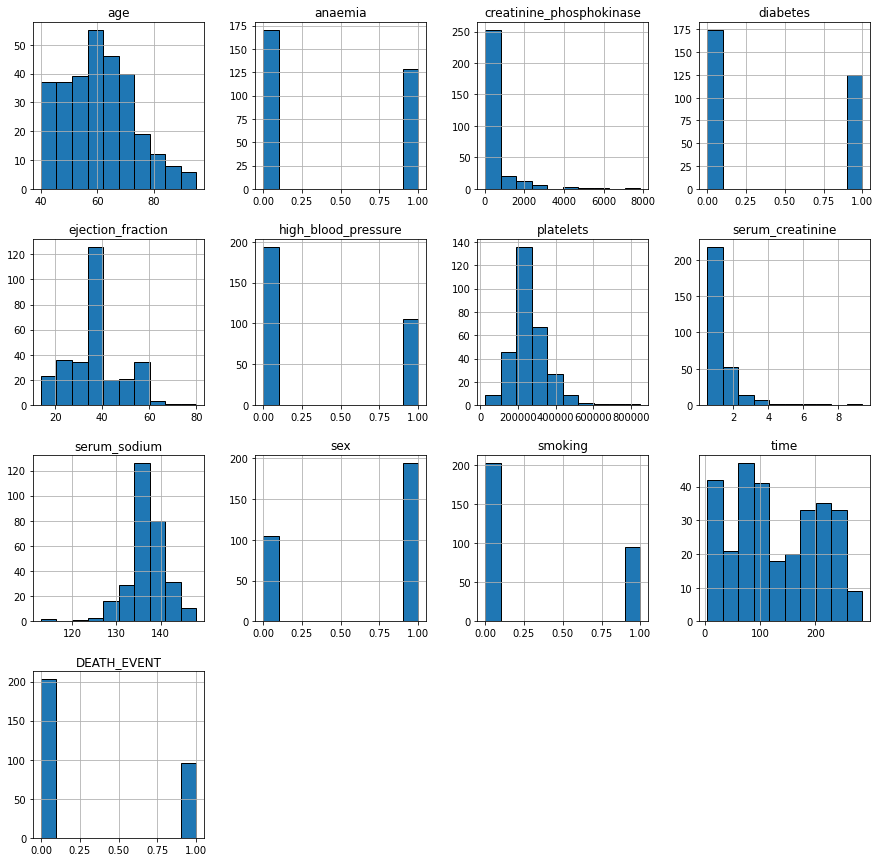

In [5]:
train.hist(figsize=(15,15),edgecolor='black');


[0.09748272 0.02599132 0.07833639 0.02823616 0.13528    0.02408101
 0.07360975 0.1154081  0.0856119  0.024411   0.03023874 0.28131291]


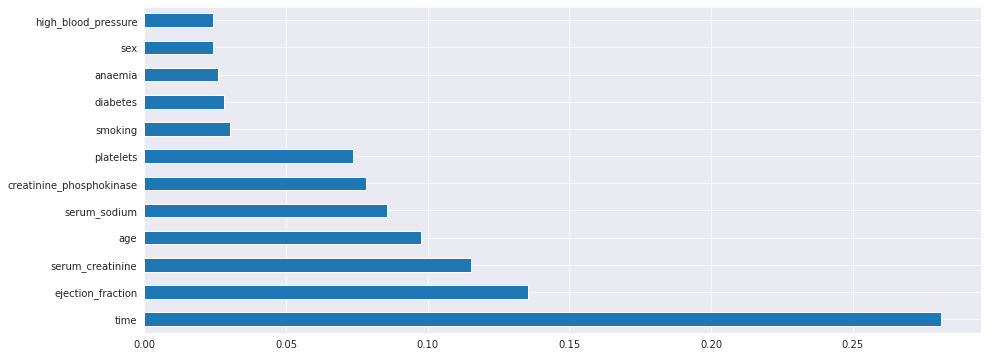

In [6]:
import matplotlib.pyplot as plt
import seaborn as sns 

plt.rcParams['figure.figsize']=15,6 
sns.set_style("darkgrid")

x = train.iloc[:, :-1]
y = train.iloc[:,-1]
from sklearn.ensemble import ExtraTreesClassifier

model = ExtraTreesClassifier()
model.fit(x,y)
print(model.feature_importances_) 
feat_importances = pd.Series(model.feature_importances_, index=x.columns)
feat_importances.nlargest(12).plot(kind='barh')
plt.show()

### Drop some parameters because it had a corrolation almost aqual to 0

In [7]:
train=train.drop(['anaemia','creatinine_phosphokinase','diabetes','high_blood_pressure','platelets','sex','smoking','age'],axis=1)

# split data into training and testing

In [8]:
 from sklearn.model_selection import train_test_split
x=train.drop('DEATH_EVENT',axis=1)
y=train.DEATH_EVENT
x_train,x_test,y_train,y_test = train_test_split(x,y,test_size=0.3)

# creating model 

In [9]:
ann = tf.keras.models.Sequential()

In [10]:
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))
ann.add(tf.keras.layers.Dense(units = 7, activation = 'relu'))

ann.add(tf.keras.layers.Dense(units = 1, activation = 'sigmoid'))

# compile model

In [11]:
val_accuracy=ann.compile(optimizer = 'adam', loss = 'binary_crossentropy' , metrics = ['accuracy'] )

# train our model

In [12]:
history=ann.fit(x_train, y_train,validation_data = (x_test, y_test), batch_size = 16, epochs = 150)

Epoch 1/150

If you intended to run this layer in float32, you can safely ignore this warning. If in doubt, this warning is likely only an issue if you are porting a TensorFlow 1.X model to TensorFlow 2.

To change all layers to have dtype float64 by default, call `tf.keras.backend.set_floatx('float64')`. To change just this layer, pass dtype='float64' to the layer constructor. If you are the author of this layer, you can disable autocasting by passing autocast=False to the base Layer constructor.

14/14 [==============================] - 0s 11ms/step - loss: 25.5082 - accuracy: 0.3397 - val_loss: 25.9624 - val_accuracy: 0.2778
Epoch 2/150
14/14 [==============================] - 0s 3ms/step - loss: 18.7489 - accuracy: 0.3397 - val_loss: 18.7977 - val_accuracy: 0.2778
Epoch 3/150
14/14 [==============================] - 0s 3ms/step - loss: 13.2043 - accuracy: 0.3397 - val_loss: 12.9596 - val_accuracy: 0.2778
Epoch 4/150
14/14 [==============================] - 0s 3ms/step - loss: 8.795

In [15]:
score = ann.evaluate(x_test,y_test)
print('Test Loss',score[0])
print("Test Accuracy",score[1])

3/3 [==============================] - 0s 1ms/step - loss: 0.4270 - accuracy: 0.8222
Test Loss 0.4269659221172333
Test Accuracy 0.8222222328186035


# Summary of model

In [16]:
ann.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 7)                 35        
_________________________________________________________________
dense_1 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_2 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_3 (Dense)              (None, 7)                 56        
_________________________________________________________________
dense_4 (Dense)              (None, 1)                 8         
Total params: 211
Trainable params: 211
Non-trainable params: 0
_________________________________________________________________


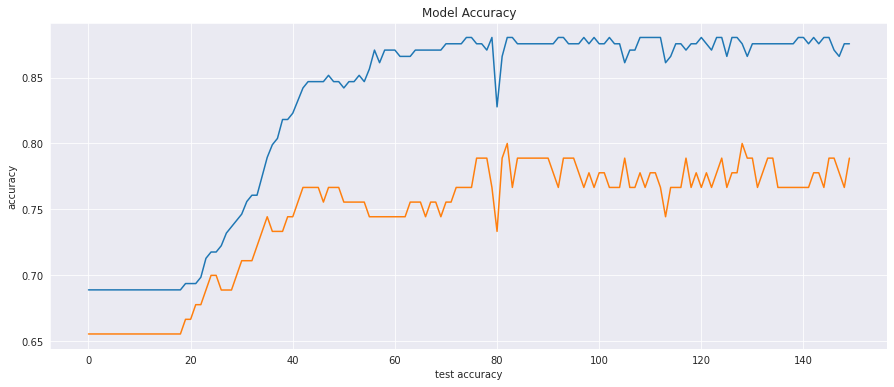

In [17]:
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])

plt.title('Model Accuracy')
plt.ylabel('accuracy')
plt.xlabel('test accuracy')


plt.show()

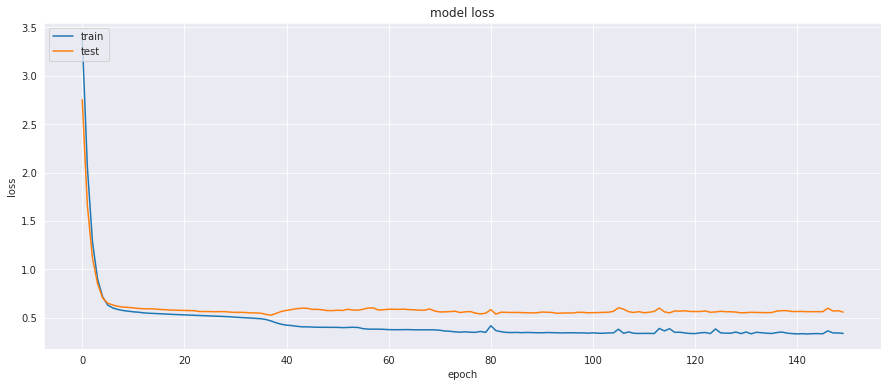

In [18]:
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'test'], loc='upper left')
plt.show()

In [19]:
ann.save('hrt.h5')

# Model prediction

In [20]:
from tensorflow.keras.models import load_model
m = load_model('hrt.h5')
m.predict_classes(x_test)

array([[0],
       [0],
       [1],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [1],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [1],
       [1],
       [0],
       [0],
       [0],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [1],
       [0],
       [1],
       [1],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
       [0],
    